# Import and Load

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set() # Setting seaborn as default style even if use only matplotlib

In [ ]:
cat = ['DRILL_BIT_ID', 'DRILL_BIT_NAME']
config = {
    "Buzz Drilldrin": [5000, 1.5, 0],
    "AstroBit": [3000, 1, 1500],
    "Apollo": [1000, 4, 2500],
    "ChallengDriller": [10000, 0, 0],
}

In [ ]:
def load_data(file_dir, number):
    data = [
        pd.read_csv(
            f"{file_dir}{i}.csv"
        )
        for i in range(1, number + 1)
    ]
    return data

# Compute Time and Cost

In [ ]:
def get_cost_and_time_for_asteroid(input_df, input_config):
    # Get Cost and Time per Asteroid
    # Returns total cost and total time for a particular asteroid

    # compute time
    prev = None
    for index, row in input_df.iterrows():
        if prev is not None:
            depth = row["BIT_DEPTH"] - prev["BIT_DEPTH"]
            input_df.at[index, "STEP_DEPTH"] = depth
            try:
                input_df.at[index, "TIME"] = depth / (
                        (row["RATE_OF_PENETRATION"] + prev["RATE_OF_PENETRATION"]) / 2
                )
                if prev["DRILL_BIT_ID"] != row["DRILL_BIT_ID"]:
                    input_df.at[index, "TIME"] += 30 / 3600 * 2 * (row["BIT_DEPTH"] / 100)
            except:
                input_df.at[index, "TIME"] = 0
        else:
            input_df.at[index, "TIME"] = 0
            input_df.at[index, "STEP_DEPTH"] = 0
        prev = row

    # compute cost
    prev = None
    used_drill_id = set()
    for index, row in input_df.iterrows():
        cost_per_run, cost_per_foot, cost_per_hour = input_config[row["DRILL_BIT_NAME"]]

        input_df.at[index, "COST"] = (
                row["STEP_DEPTH"] * cost_per_foot + row["TIME"] * cost_per_hour
        )
        if row["DRILL_BIT_ID"] not in used_drill_id:
            used_drill_id.add(row["DRILL_BIT_ID"])
            input_df.at[index, "COST"] += cost_per_run
        prev = row

    # Extract costs and times
    total_cost = input_df["COST"].sum()
    total_time = input_df["TIME"].sum()

    return total_cost, total_time

# Normalizing and Remove Outliers 

In [ ]:
def normalize(input_df, input_cat):
    # normalize
    input_cat = set(input_cat)
    normalized_df = input_df
    for col in input_df.columns:
        if col not in input_cat:
            normalized_df[col] = (input_df[col] - input_df[col].mean()) / input_df[col].std()
    return normalized_df

In [ ]:
def remove_outliers(input_df, input_cat, const):
    new_df = input_df
    input_cat = set(input_cat)
    const = const
    for col in new_df.columns:
        if col not in input_cat:
            q1 = new_df[col].quantile(0.25)
            q3 = new_df[col].quantile(0.75)
            iqr = (q3 - q1)  # iqr is interquartile range.

            # filter = (normalized_df[col] >= q1 - 1.5 * iqr) & (normalized_df[col] <= q3 + 1.5 *iqr)
            new_df = new_df[new_df[col] >= q1 - const * iqr]
            new_df = new_df[new_df[col] <= q3 + const * iqr]
            new_df = new_df[new_df[col] != 0]
    return new_df

# New

In [ ]:
file_dir = "https://raw.githubusercontent.com/ClassicSours/TheInterstellarAsteroidRush/main/Asteroids/Asteroid%20"

data = load_data(file_dir, 20)
normalized_data = data.copy()
for d in range(len(data)):
    data[d] = remove_outliers(data[d], cat, 15.0)
    normalized_data[d] = normalize(normalized_data[d], cat)

In [ ]:
i = int(0)

In [ ]:
def compute_timestamp(input_df):
    timestampe = 0
    for index, row in input_df[i].iterrows():
        timestampe += row["TIME"]
        input_df[i].at[index, "TIMESTAMP"] = timestampe

In [ ]:
total_cost, total_time = get_cost_and_time_for_asteroid(data[i], config)
compute_timestamp(data)

In [ ]:
total_cost, total_time = get_cost_and_time_for_asteroid(normalized_data[i], config)
compute_timestamp(normalized_data)

In [ ]:
data[i].columns

Index(['BIT_DEPTH', 'RATE_OF_PENETRATION', 'HOOK_LOAD',
       'DIFFERENTIAL_PRESSURE', 'WEIGHT_ON_BIT', 'DRILL_BIT_ID',
       'DRILL_BIT_NAME', 'TIME', 'STEP_DEPTH', 'COST', 'TIMESTAMP'],
      dtype='object')

In [ ]:
remove_outliers(data[i], cat, 10.0)

,BIT_DEPTH,RATE_OF_PENETRATION,HOOK_LOAD,DIFFERENTIAL_PRESSURE,WEIGHT_ON_BIT,DRILL_BIT_ID,DRILL_BIT_NAME,TIME,STEP_DEPTH,COST,TIMESTAMP
1,746.53,289.74,107.61,114.19,3.01,1,Buzz Drilldrin,0.005422,1.52,2.280000,0.005422
2,747.02,289.74,104.44,98.99,5.04,1,Buzz Drilldrin,0.001691,0.49,0.735000,0.007113
3,748.54,284.22,106.09,121.55,3.69,1,Buzz Drilldrin,0.005297,1.52,2.280000,0.012410
4,749.02,298.22,105.44,93.13,3.28,1,Buzz Drilldrin,0.001648,0.48,0.720000,0.014058
5,750.53,285.67,106.78,106.12,2.48,1,Buzz Drilldrin,0.005172,1.51,2.265000,0.019230
...,...,...,...,...,...,...,...,...,...,...,...
12181,14314.51,212.06,187.44,1109.94,22.17,2,AstroBit,0.006497,1.45,11.195934,81.276990
12182,14315.04,234.69,187.47,1104.86,21.99,2,AstroBit,0.002373,0.53,4.089037,81.279363
12183,14316.55,225.35,188.84,1102.61,21.24,2,AstroBit,0.006565,1.51,11.356970,81.285928
12184,14317.01,213.28,189.42,1095.56,21.25,2,AstroBit,0.002097,0.46,3.606160,81.288025


In [ ]:
filter=(data[i]["DRILL_BIT_NAME"]=="Buzz Drilldrin")

In [ ]:
filter

0         True
1         True
2         True
3         True
4         True
         ...  
17525    False
17526    False
17527    False
17528    False
17529    False
Name: DRILL_BIT_NAME, Length: 17287, dtype: bool

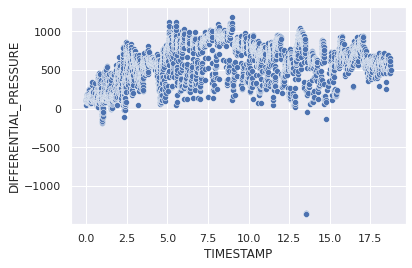

In [ ]:
sns.scatterplot(x=data[i][filter]["TIMESTAMP"], 
                y=data[i][filter]["DIFFERENTIAL_PRESSURE"])

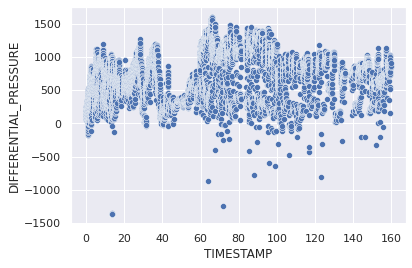

In [ ]:
sns.scatterplot(x=data[i]["TIMESTAMP"], 
                y=data[i]["DIFFERENTIAL_PRESSURE"])

In [ ]:
data[i].columns

Index(['BIT_DEPTH', 'RATE_OF_PENETRATION', 'HOOK_LOAD',
       'DIFFERENTIAL_PRESSURE', 'WEIGHT_ON_BIT', 'DRILL_BIT_ID',
       'DRILL_BIT_NAME', 'TIME', 'STEP_DEPTH', 'COST', 'ELAPSED'],
      dtype='object')

In [ ]:
for i in ['BIT_DEPTH', 'RATE_OF_PENETRATION', 'HOOK_LOAD',
       'DIFFERENTIAL_PRESSURE', 'WEIGHT_ON_BIT', 'DRILL_BIT_ID', 'TIME', 'STEP_DEPTH', 'COST', 'ELAPSED']:
    a = data[0][i].mean()
    b = data[0][i].std()
    print(f"{i}: {a} ; {b}\n")

BIT_DEPTH: 10496.970494302077 ; 5708.292644128712

RATE_OF_PENETRATION: 231.93895557355236 ; 143.91932833303002

HOOK_LOAD: 150.38653988546304 ; 33.05675774782965

DIFFERENTIAL_PRESSURE: 770.4394316538439 ; 326.2942958306679

WEIGHT_ON_BIT: 36.06205472320241 ; 12.704745132148794

DRILL_BIT_ID: 2.107306068143692 ; 0.9259880396450831

TIME: 0.00923340314892188 ; 0.03508102654220752

STEP_DEPTH: 1.1502007288714062 ; 0.9302661091074693

COST: 7.995706976800908 ; 120.06135999104153

ELAPSED: 58.08696757324511 ; 46.328038567507114



In [ ]:
data[i]['ELAPSED'].std()

46.328038567507114

In [ ]:
new_drill = []
for i in data:
    drill_id = 0
    for index, row in i.iterrows():
        if row["DRILL_BIT_ID"] > drill_id:
            new_drill.append(row)
            drill_id += 1


In [ ]:
def get_depth_cost_and_time_for_asteroid(input_df, input_config):
    bit_stats = {
        "Buzz Drilldrin": [0, 0, 0],  # [depth, cost, time]
        "AstroBit": [0, 0, 0],
        "Apollo": [0, 0, 0],
        "ChallengDriller": [0, 0, 0],
    }
    prev = None
    used_drill_id = set()
    for _, row in input_df.iterrows():
        cost_per_run, cost_per_foot, cost_per_hour = input_config[row["DRILL_BIT_NAME"]]
        if prev is not None:
            depth = row["BIT_DEPTH"] - prev["BIT_DEPTH"]
            bit_stats[row["DRILL_BIT_NAME"]][0] += depth
            if (row["RATE_OF_PENETRATION"] + prev["RATE_OF_PENETRATION"]) != 0:
                time = depth / (
                    (row["RATE_OF_PENETRATION"] + prev["RATE_OF_PENETRATION"]) / 2
                )
            else:
                time = 0
            bit_stats[row["DRILL_BIT_NAME"]][2] += time
            bit_stats[row["DRILL_BIT_NAME"]][1] += (
                depth * cost_per_foot + time * cost_per_hour
            )
            if row["DRILL_BIT_ID"] not in used_drill_id:
                used_drill_id.add(row["DRILL_BIT_ID"])
                bit_stats[row["DRILL_BIT_NAME"]][1] += cost_per_run
        prev = row
    return bit_stats

In [ ]:
config = {
    "Buzz Drilldrin": [5000, 1.5, 0],
    "AstroBit": [3000, 1, 1500],
    "Apollo": [1000, 4, 2500],
    "ChallengDriller": [10000, 0, 0],
}